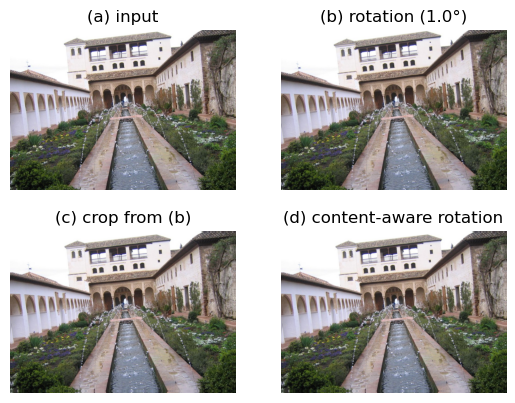

In [64]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return rotated

def crop_largest_rectangle(image, angle):
    (h, w) = image.shape[:2]
    angle = np.deg2rad(angle)
    cos = np.abs(np.cos(angle))
    sin = np.abs(np.sin(angle))

    # Compute the new bounding dimensions of the image
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to take into account translation
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
    M[0, 2] += (new_w / 2) - w // 2
    M[1, 2] += (new_h / 2) - h // 2

    # Perform the actual rotation and return the image
    rotated = cv2.warpAffine(image, M, (new_w, new_h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    # Compute the largest rectangle
    rect_w = int(w * cos + h * sin)
    rect_h = int(h * cos + w * sin)

    # Crop the image
    x = (new_w - rect_w) // 2
    y = (new_h - rect_h) // 2
    cropped = rotated[y:y + rect_h, x:x + rect_w]
    return cropped

def find_rotation_angle(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is not None:
        angles = []
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta) - 90
            if angle < -45:
                angle += 90
            elif angle > 45:
                angle -= 90
            angles.append(angle)
        return np.median(angles)
    return 0

# Load the image
image = cv2.imread('image1.png')

# Step (a): Display the input image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('(a) input')
plt.axis('off')

# Step (b): Find the rotation angle using content-aware method
rotation_angle = find_rotation_angle(image)
rotated_image = rotate_image(image, rotation_angle)
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title(f'(b) rotation ({rotation_angle:.1f}°)')
plt.axis('off')

# Step (c): Crop the largest rectangle from the rotated image
cropped_image = crop_largest_rectangle(image, rotation_angle)
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('(c) crop from (b)')
plt.axis('off')

# Step (d): Content-aware rotation (if needed)
# For simplicity, we assume the content-aware rotation is the same as the cropped image
content_aware_image = cropped_image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(content_aware_image, cv2.COLOR_BGR2RGB))
plt.title('(d) content-aware rotation')
plt.axis('off')

plt.show()
